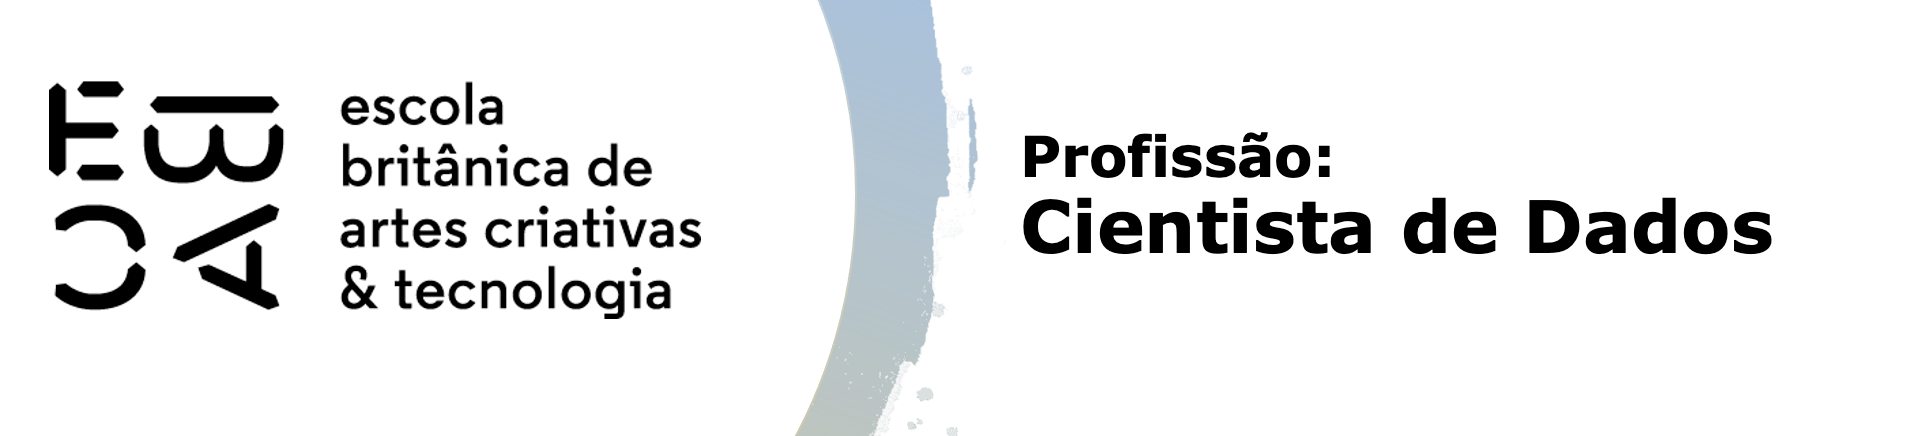

# Tarefa

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy import stats

In [50]:
caminho_arquivo = 'penguins.csv'
dados_pinguins = pd.read_csv(caminho_arquivo)

In [51]:
dados_pinguins.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

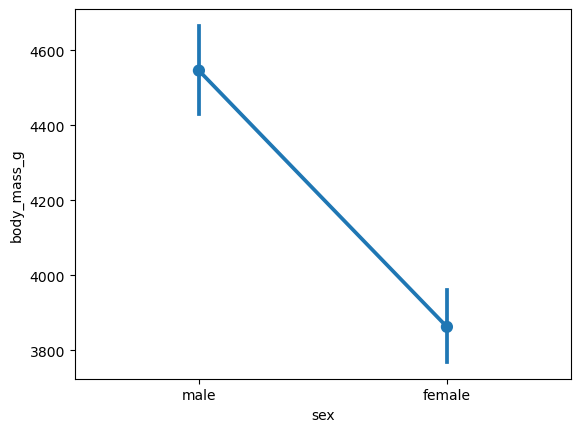

In [52]:
sns.pointplot(data=dados_pinguins, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [54]:
dados_limpios = dados_pinguins.dropna(subset=['body_mass_g', 'sex'])

In [55]:
# Separar os dados por sexo
pesos_machos = dados_limpios[dados_limpios['sex'] == 'male']['body_mass_g']
pesos_femeas = dados_limpios[dados_limpios['sex'] == 'female']['body_mass_g']

In [56]:
resultado_teste_t = stats.ttest_ind(pesos_machos, pesos_femeas)

In [58]:
resultado_teste_t

TtestResult(statistic=8.541720337994516, pvalue=4.897246751596224e-16, df=331.0)

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

In [60]:
# Configurações da distribuição t
graus_de_liberdade = len(pesos_machos) + len(pesos_femeas) - 2
media_diferenca = np.mean(pesos_machos) - np.mean(pesos_femeas)
t_critico = stats.t.ppf(1 - 0.05/2, df=graus_de_liberdade) 

In [61]:
# Criação da distribuição t
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df=graus_de_liberdade)

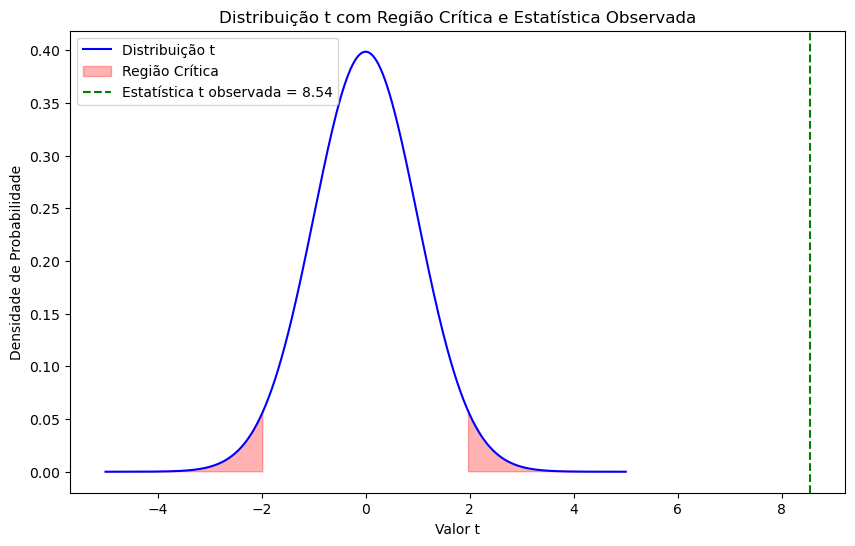

In [62]:
# Plotagem da distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t', color='blue')

# Sombrear a região crítica
plt.fill_between(x, y, where=(x >= t_critico) | (x <= -t_critico), color='red', alpha=0.3, label='Região Crítica')

# Adicionar linha para a estatística t observada
plt.axvline(resultado_teste_t.statistic, color='green', linestyle='--', label=f'Estatística t observada = {resultado_teste_t.statistic:.2f}')

# Configurações do gráfico
plt.title('Distribuição t com Região Crítica e Estatística Observada')
plt.xlabel('Valor t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [63]:
p_valores_por_especie = {}

# Loop pelas espécies únicas na base de dados
for especie in dados_limpios['species'].unique():
    # Filtrar os dados pela espécie atual
    dados_especie = dados_limpios[dados_limpios['species'] == especie]
    
    # Separar os pesos por sexo para a espécie atual
    pesos_machos_especie = dados_especie[dados_especie['sex'] == 'male']['body_mass_g']
    pesos_femeas_especie = dados_especie[dados_especie['sex'] == 'female']['body_mass_g']
    
    # Realizar o teste t
    resultado_teste_t_especie = stats.ttest_ind(pesos_machos_especie, pesos_femeas_especie)
    
    # Armazenar o p-valor no dicionário
    p_valores_por_especie[especie] = resultado_teste_t_especie.pvalue

p_valores_por_especie

{'Adelie': 2.2206436307866114e-26,
 'Gentoo': 2.133687602018886e-28,
 'Chinstrap': 2.043956471470739e-06}